# Lab 04: Opérations géométriques et autres outils mathématiques

## Bibliothèques

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Définition des fonctions de plots

In [3]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

## Manipulations géometriques

### Scaling: échelonage

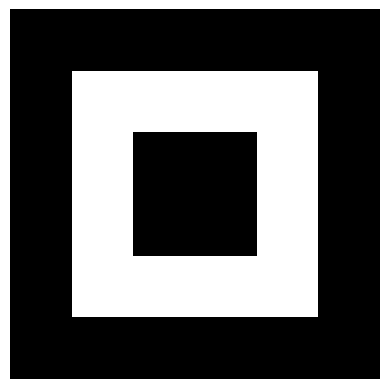

array([[  0.,   0.,   0.,   0.,   0.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.]])

In [10]:
toy_image = np.zeros((6,6))
toy_image[1:5,1:5]=255
toy_image[2:4,2:4]=0
plt.imshow(toy_image,cmap="gray")
plt.axis("off")
plt.show()
toy_image

**Nous deffinissons une matrice 6x6 puis nous clorons les pixels blancs puis les noirs**

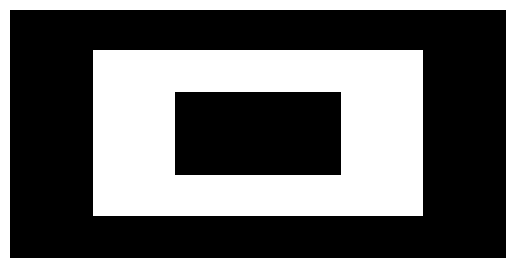

In [13]:
new_toy = cv2.resize(toy_image,None,fx=2,fy=1,interpolation=cv2.INTER_NEAREST)
plt.imshow(new_toy,cmap='gray')
plt.axis("off")
plt.show()

**Nous remarquons un réajustement (échelonage horizontal)**

La dim horizontal fait deux fois la taille de la dim verticale

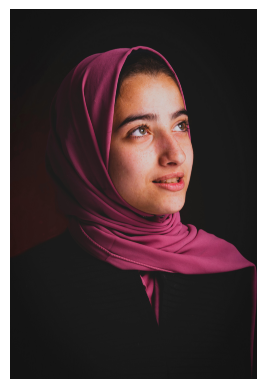

In [18]:
image = cv2.imread("image1.jpg")
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()